In [211]:
%matplotlib inline
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import copy

noOfStates = 99
goal = 100
coinTossProb = 0.5

In [212]:
def coinToss():
    if random.random() < coinTossProb:
        return True
    return False

In [213]:
def getNumOfActions(stateVal):
    return min(stateVal, goal - stateVal)

In [214]:
def getReward(stateValue):
    # Adding negative value to out of captital. 
    if stateValue == goal:
        return 1
#     if stateValue == 0:
#         return -1
    return 0

In [215]:
def getMaxActionValue(stateVal, V):
    maxActionVal = -1000
    maxAction = -100
    numOfActions = getNumOfActions(stateVal)
    for action in range(1,numOfActions+1):
        # Check this bound
        sucState1 = stateVal + action
        sucState2 = stateVal - action
        actionVal = (coinTossProb * (getReward(sucState1) + V[sucState1])) + \
            ((1-coinTossProb) * (getReward(sucState2) + V[sucState2]))
#         print "Action Vale for %s is %s" % (action, actionVal)
        
        if(float("{0:.12f}".format(actionVal)) > float("{0:.12f}".format(maxActionVal))):
            maxActionVal = actionVal
            maxAction = action
    return (maxActionVal, maxAction)

In [216]:
def getOptimalPolicy(V):
    optimalPolicy = []
    for i in range(1,noOfStates+1):
        _, maxAction = getMaxActionValue(i, V)
        optimalPolicy.append(maxAction)
    return optimalPolicy

In [217]:
def valueIterations():
    V = [0]*(noOfStates+1+1)
    V_entire = []
    minVal = pow(10,-12)
    no_of_iterations = 0
    print minVal
    delta = 0
#     print 'value iterating'
    sufficientErrorReached = False
    while not sufficientErrorReached:
        delta = 0
        no_of_iterations += 1
        #print 'Enter loop'
        for i in range(1,noOfStates+1):
            v = V[i]
            V[i], _ = getMaxActionValue(i, V)
#             print 'obtained value of state %s' %V[i]
            delta = max(delta, abs(v - V[i]))
#         print 'Delta %s' % delta
        if no_of_iterations % 1 == 0:
            V_entire.append(copy.deepcopy(V))
        if delta < minVal:
            sufficientErrorReached = True
#     print V
    policy = getOptimalPolicy(V)
#     print policy
    print 'No of iterations taken %s'%no_of_iterations
    return V,V_entire,policy

In [218]:
V,V_entire,optimalPolicy = valueIterations()
print len(optimalPolicy)


1e-12
No of iterations taken 15
99


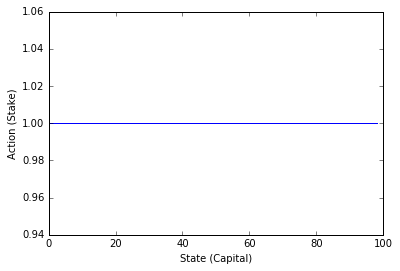

In [219]:
plt.plot(optimalPolicy)
plt.ylabel('Action (Stake)')
plt.xlabel('State (Capital)')

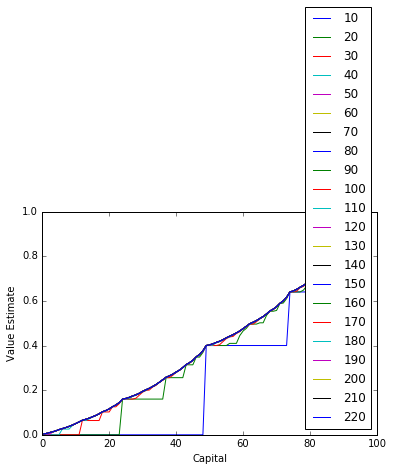

In [207]:
legend_values = [i*10 for i in range(1,len(V_entire)+1)]
for iteration_value in V_entire:
    plt.plot(iteration_value[1:len(iteration_value)-1])

plt.ylabel('Value Estimate')
plt.xlabel('Capital')
plt.legend(legend_values, loc='lower right')

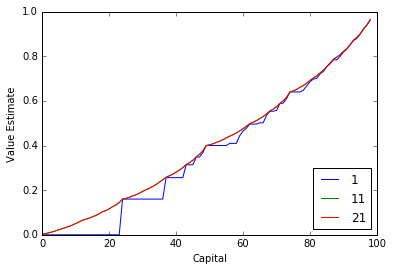

In [208]:
legend_values = range(1,min(len(V_entire),100),10)
for value in legend_values:
    iteration_value = V_entire[value]
    plt.plot(iteration_value[1:len(iteration_value)-1])

plt.ylabel('Value Estimate')
plt.xlabel('Capital')
plt.legend(legend_values, loc='lower right')

In [209]:
probabilities = np.linspace(0.5,1,6)
optimalPolicies= []
for probability in probabilities:
    coinTossProb = probability
    V,_,optimalPolicy = valueIterations()
    optimalPolicies.append(optimalPolicy)

1e-12
No of iterations taken 15
1e-12
No of iterations taken 745
1e-12
No of iterations taken 235
1e-12
No of iterations taken 107
1e-12
No of iterations taken 57
1e-12
No of iterations taken 8


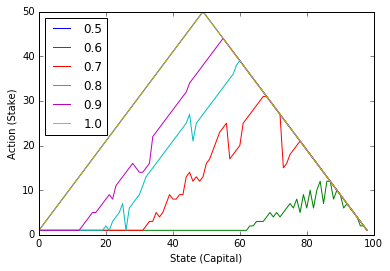

In [210]:
legend = []
for optimalPolicy in optimalPolicies:
    plt.plot(optimalPolicy)

plt.legend(probabilities, loc='upper left')
plt.ylabel('Action (Stake)')
plt.xlabel('State (Capital)')
plt.show()